In [2]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
path_shp_recorridos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\RECORRIDOS.shp'
path_shp_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

In [4]:
# Cargar los archivos Shapefile
gdf_recorridos = gpd.read_file(path_shp_recorridos)
gdf_plan = gpd.read_file(path_shp_plan)

In [5]:
idd = 1

In [6]:
selec_recorridos = gdf_recorridos[gdf_recorridos['idd']==idd]

In [7]:
selec_plan = gdf_plan[gdf_plan['idd'] == idd]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10236\2512288014.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


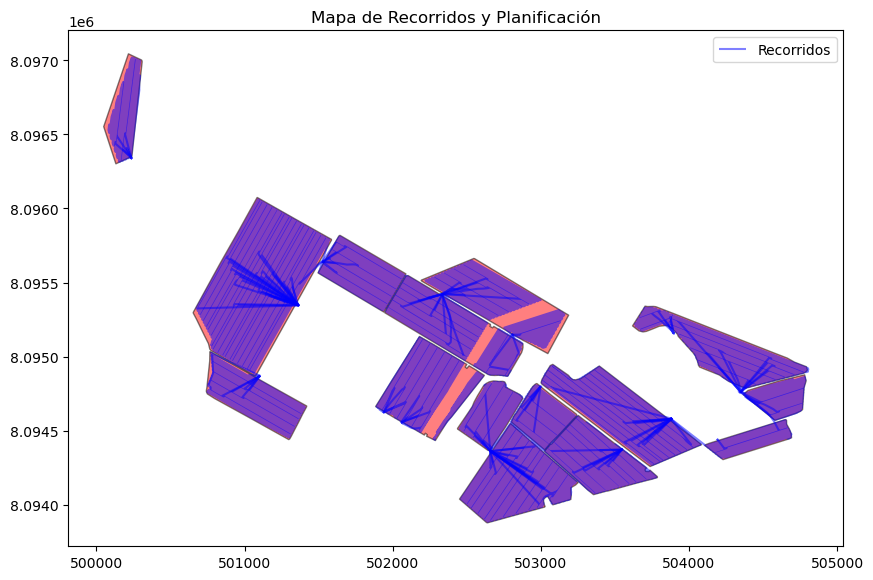

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
# Graficar las capas
selec_recorridos.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", label="Recorridos")
selec_plan.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", label="Planificación")

# Configurar la visualización
ax.set_title("Mapa de Recorridos y Planificación")
ax.legend()

# Mostrar el gráfico
plt.show()

In [10]:
selec_recorridos["fecha"] = pd.to_datetime(selec_recorridos["fecha"])

In [11]:
# Obtener la fecha mínima y máxima
fecha_min = selec_recorridos["fecha"].min()
fecha_max = selec_recorridos["fecha"].max()
fecha_intermedia = fecha_min + (fecha_max - fecha_min) / 2

In [12]:
# Convertir las fechas al formato dd/mm/aaaa
fecha_min_str = fecha_min.strftime("%d/%m/%Y")
fecha_max_str = fecha_max.strftime("%d/%m/%Y")
fecha_intermedia_str = fecha_intermedia.strftime("%d/%m/%Y")
# Obtener el número de semana de la fecha intermedia
numero_semana = fecha_intermedia.isocalendar().week

In [13]:
area_total_pulv = selec_recorridos['area'].sum()
area_total_pulv

293.48466813409004

In [14]:
fecha_min_str

'06/03/2025'

In [15]:
fecha_max_str

'08/03/2025'

In [16]:
fecha_intermedia_str

'07/03/2025'

In [17]:
numero_semana

10

In [18]:
num_vuelos = len(selec_recorridos)
num_vuelos

104

In [22]:
selec_recorridos

,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,geometry
0,T40_20250307131940_R5630753528.kml,2025-03-07,13:19:40,R5630753528,T40,1581F574B238900100GF,MARIO SANCHEZ,9:26,Auto,5.0,9.640,29.880001,3.350000,33.825,1,"LINESTRING (503877.967 8094579.033, 503877.974..."
1,T40_20250307133501_R6431655408.kml,2025-03-07,13:35:01,R6431655408,T40,1581F574B238900100GF,MARIO SANCHEZ,9:46,Auto,5.0,9.640,29.880001,3.548667,35.917,1,"LINESTRING (503876.695 8094578.178, 503876.695..."
2,T40_20250307134823_R6551790690.kml,2025-03-07,13:48:23,R6551790690,T40,1581F574B238900100GF,MARIO SANCHEZ,9:13,Auto,4.4,9.640,29.880001,3.148667,31.913,1,"LINESTRING (503881.318 8094576.323, 503881.287..."
3,T40_20250307140126_R6611858331.kml,2025-03-07,14:01:26,R6611858331,T40,1581F574B238900100GF,MARIO SANCHEZ,9:23,Auto,4.4,9.640,29.880001,3.354000,34.072,1,"LINESTRING (503880.632 8094579.144, 503880.631..."
4,T40_20250307141430_R6832106348.kml,2025-03-07,14:14:30,R6832106348,T40,1581F574B238900100GF,MARIO SANCHEZ,10:48,Auto,4.4,9.640,29.880001,3.429333,34.590,1,"LINESTRING (503880.530 8094579.078, 503880.530..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,T50_20250308063919_R5355679725.kml,2025-03-08,06:39:19,R5355679725,T50,1581F6BUB24630011R08,MARIO SANCHEZ,3:45,Auto,4.0,9.227,29.880001,0.468667,4.651,1,"LINESTRING (503897.642 8095156.368, 503792.268..."
100,T50_20250308073745_R6957483485.kml,2025-03-08,07:37:45,R6957483485,T50,1581F6BUB24630011R08,MARIO SANCHEZ,10:11,Auto,4.0,9.590,29.880001,3.615333,36.274,1,"LINESTRING (500237.518 8096338.480, 500237.518..."
101,T50_20250308075056_R7778407912.kml,2025-03-08,07:50:56,R7778407912,T50,1581F6BUB24630011R08,MARIO SANCHEZ,6:29,Auto,4.0,9.590,29.880001,1.677333,16.795,1,"LINESTRING (500237.351 8096339.196, 500237.351..."
102,T50_20250308075725_R7838475553.kml,2025-03-08,07:57:25,R7838475553,T50,1581F6BUB24630011R08,MARIO SANCHEZ,1:04,M/M+,0.0,0.000,0.000000,0.060667,2.181,1,"LINESTRING (500237.248 8096340.024, 500204.761..."


In [27]:
# Convert "fl_time" to total seconds
selec_recorridos["fl_time_sec"] = selec_recorridos["fl_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
# Sum all seconds
total_seconds = selec_recorridos["fl_time_sec"].sum()
# Convert back to hh:mm:ss format
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
total_flight_time = f"{hours:02}:{minutes:02}:{seconds:02}"
total_flight_time

'15:03:42'

In [28]:
total_caudal = selec_recorridos['spray'].sum()
total_caudal

2952.6639999999998

In [29]:
df_parte = pd.read_excel(path_xlsx_parte)

In [30]:
# extraer primer dato de temp max
temp_max = df_parte[df_parte['idd'] == idd]['TEMP MAX'][0]
temp_min = df_parte[df_parte['idd'] == idd]['TEMP MIN'][0]

In [31]:
temp = round((temp_max + temp_min) / 2)
temp

In [33]:
# Aplicar el buffer a la geometría
selec_recorridos["geometry"] = selec_recorridos.geometry.buffer(5.5)

In [34]:
# Disolver todas las geometrías en un solo polígono
buffer_dissolved = selec_recorridos.dissolve()

In [36]:
buffer_dissolved

,geometry,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,fl_time_sec
0,"MULTIPOLYGON (((501323.399 8094489.049, 501323...",T40_20250307131940_R5630753528.kml,2025-03-07,13:19:40,R5630753528,T40,1581F574B238900100GF,MARIO SANCHEZ,9:26,Auto,5.0,9.64,29.880001,3.35,33.825,1,566


In [37]:
# Calcular la intersección
interseccion = gpd.overlay(buffer_dissolved, selec_plan, how="intersection")

In [38]:
# Calcular el área de cada polígono de la intersección
interseccion["area_rociado"] = interseccion.geometry.area / 10000

In [39]:
resumen = interseccion[['id_2', 'unidad_05', 'area_2', 'area_rociado']].copy()

In [40]:
# Calcular el total de area_2
total_area_2 = resumen["area_2"].sum()
total_area_rociado = resumen["area_rociado"].sum()
# Crear una nueva columna con el porcentaje
resumen["porcen_rociado"] = (resumen["area_rociado"] / total_area_2)

In [41]:
diferencia = total_area_rociado - area_total_pulv
diferencia

4.975801522204506

In [42]:
resumen["area_diff"] = resumen["porcen_rociado"] * diferencia

In [43]:
resumen["area_rociado_ajustado"] = resumen["area_rociado"] - resumen["area_diff"]

In [44]:
resumen = resumen[['id_2', 'unidad_05', 'area_2', 'area_rociado_ajustado']].copy()

In [53]:
total_area_rociado_ajustado = resumen["area_rociado_ajustado"].sum()
resumen["porcen_rociado"] = (resumen["area_rociado_ajustado"]) / (resumen["area_2"])

In [54]:
resumen["dif_area"] = resumen["area_2"] - resumen["area_rociado_ajustado"]

In [64]:
resumen

,id_2,unidad_05,area_2,area_rociado_ajustado,porcen_rociado,dif_area
0,1,EP-L31,30.260942,28.633271,0.946212,1.627670
1,2,EP-L16,23.216246,21.664272,0.933151,1.551974
2,3,ER-L6,19.683505,19.160233,0.973416,0.523272
3,4,EP-L35,7.795719,7.369442,0.945319,0.426277
4,5,EP-L34,7.048921,6.632540,0.940930,0.416380
5,6,ER-L5,10.318332,9.850859,0.954695,0.467473
6,7,ER-L9,26.783587,21.533076,0.803965,5.250511
7,8,ER-L15,17.950658,16.469801,0.917504,1.480858
8,9,EP-L7,15.371285,14.745376,0.959281,0.625909
9,10,EP-L10,26.586339,20.709980,0.778971,5.876360


In [74]:
for i, row in resumen.iterrows():
    df_parte.loc[(df_parte['ID'] == row['id_2']), 'AREA PULVERIZADO'] = row['area_rociado_ajustado']

In [76]:
df_parte.loc[(df_parte['idd'] == idd), 'FECHA'] = fecha_intermedia_str
df_parte.loc[(df_parte['idd'] == idd), 'SEMANA'] = numero_semana
df_parte.loc[(df_parte['idd'] == idd), 'HORA DE INICIO'] = fecha_min_str
df_parte.loc[(df_parte['idd'] == idd), 'HORA FINAL'] = fecha_max_str
df_parte.loc[(df_parte['idd'] == idd), 'TEMPERATURA'] = temp
df_parte.loc[(df_parte['idd'] == idd), 'NUM VUELOS'] = num_vuelos
df_parte.loc[(df_parte['idd'] == idd), 'HORAS VUELO'] = total_flight_time
df_parte.loc[(df_parte['idd'] == idd), 'TOTAL CAUDAL'] = total_caudal

In [78]:
output_path = path_xlsx_parte
df_parte.to_excel(output_path, index=False)